# Tutorial - `#01` Getting Started with Computer Vision in `PyTorch`.

**📑 TimeLine:**
1. [Setting Up the Enviroment]().
2. [What is Computer Vision (CV)]().
3. [Machine Learning vs Deep Learning]().
4. [Image Classification]().
5. [K-Nearest Neighbors (K-NN) Classification]().
6. [Overall Sum Up and further explanation.]()
---

In this tutorial, we will explore the basics of Computer Vision using `PyTorch` in a `Google Colab` environment. We will cover essential libraries, how to set up your environment, and perform some fundamental operations in Computer Vision.

Let's get started!

## [1. Setting Up the Enviroment.]()

>


`Google Colab` provides an easy way to run `Python` code in the cloud without any setup on your local machine. However, you need to ensure that all necessary libraries are installed. Follow these steps to set up your environment:

The step's are pretty easy:
1. Go to [Google Colab]() and create a new notebook.
2. In the first integrated cell Install the required libraries, by running the following commands:

In [ ]:
# Install PyTorch and torchvision
!pip install torch torchvision

# Install matplotlib for plotting
!pip install matplotlib

# Install numpy for numerical operations
!pip install numpy

3. Import the libraries that we will use for this tutorial.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

⚡ INFO about the imported Libraries:
- `torch` is the core library of `PyTorch`, a popular open-source framework for machine learning and deep learning *(The framework that will be worked on for all of this lessons)*. It provides essential tools for tensor computations, which are multi-dimensional arrays similar to `NumPy` arrays but with additional support for GPU acceleration. This allows for faster computation and efficient handling of large-scale data and complex neural network operations. `PyTorch`’s torch module is fundamental for building, training, and deploying neural network models.

- `torchvision` is an extension of `PyTorch` specifically tailored for computer vision tasks. It includes a range of pre-trained models, datasets, and image transformation tools. With torchvision, users can easily access popular image datasets like `CIFAR-10` and `ImageNet`, and apply various image processing techniques needed for preparing data for training neural networks. This module simplifies many aspects of computer vision, from loading images to working with standard model architectures.

- `torchvision.transforms` is a sub-module of torchvision focused on image preprocessing. It provides a variety of transformation functions such as resizing, cropping, and normalizing images. These transformations are crucial for preparing image data before feeding it into a neural network. By using transforms, you can ensure that your images are in the correct format and scale for effective model training and evaluation.

- `matplotlib.pyplot` is a widely-used library for creating static, interactive, and animated visualizations in `Python`. With plt, you can generate plots, charts, and images to visualize data, model predictions, and training progress. This tool is essential for exploring data, analyzing results, and presenting findings in a graphical format that’s easy to understand.

- `numpy` is a fundamental library for numerical computing in `Python`. It provides support for creating and manipulating arrays, which are powerful structures for handling large datasets and performing mathematical operations. `NumPy` is often used to convert data between formats, perform mathematical calculations, and interact with other libraries like `PyTorch`, which can handle both numpy arrays and `PyTorch` tensors

Nice! Now your enviroment is ready to start running your first `PyTorch` code.

## [2. What is Computer Vision?]()

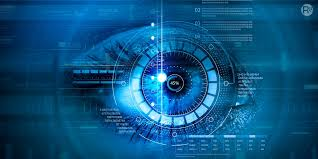


`Computer Vision` is a field of computer science that focuses on enabling computers to interpret and understand visual information from the world, similar to how humans do. It involves the development of algorithms and techniques that allow computers to process, analyze, and make decisions based on visual data.


#### **Basic Steps in Computer Vision:**
1. `Image Acquisition`: Collecting images from various sources such as cameras, videos, or other sensors.
2. `Image Preprocessing`: Enhancing the quality of images, including noise reduction, normalization, and other techniques to prepare the image for analysis.
3. `Image Analysis`: Identifying objects, shapes, or other features within the image.
4. `Image Understanding`: Extracting and interpreting meaningful information from the image data.

#### **Example - `#01`: Downloading and Visualizing `CIFAR-10` Images.**

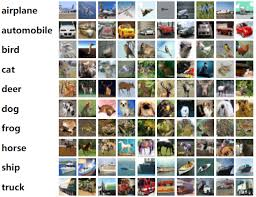


In this example, we demonstrate how to get started with `PyTorch` for computer vision tasks by downloading and visualizing images from the `CIFAR-10` dataset.

The example involves:
- setting up the necessary transformations,
- downloading the dataset, and
- displaying some random images along with their corresponding labels.

This provides a foundational understanding of handling image data in `PyTorch` and preparing it for further processing or analysis.


In [ ]:
# Define a transformation to convert images to Tensor
transform = transforms.Compose([
    transforms.ToTensor()
])


This step sets up a series of transformations to apply to each image: converting them to `PyTorch` Tensors and normalizing their pixel values to have a mean of 0.5 and a standard deviation of 0.5 for each channel.

In [ ]:
# Download and prepare the training data
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True,
    download=True, transform=transform
)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

# Download and prepare the test data
testset = torchvision.datasets.CIFAR10(
    root='./data', train=False,
    download=True, transform=transform
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=4,
    shuffle=False,
    num_workers=2
)

##### **Preparing Training Data:**
- `Download and Load the Training Dataset`: The `torchvision.datasets.` `CIFAR10` class is used to download the `CIFAR-10` training dataset. The `train=True` parameter specifies that we want the training portion of the dataset.
- `Apply Transformations`: The `transform=transform` parameter ensures that each image is transformed using the previously defined transform pipeline, converting images to Tensors and normalizing them.
- `Create DataLoader for Training`: The DataLoader class is used to load the dataset in batches. The `batch_size=4` parameter specifies that each batch will contain 4 images. The `shuffle=True` parameter ensures that the data is shuffled after each epoch, which helps improve the training process by providing the model with varied data batches.

##### **Preparing Testing Data:**
- `Download and Load the Test Dataset`: Similar to the training data, the `torchvision.datasets.CIFAR10` class is used to download the `CIFAR-10` test dataset. The `train=False` parameter specifies that we want the test portion of the dataset.
- `Apply Transformations`: The same transformation pipeline is applied to the test images to ensure consistency.
- `Create DataLoader for Testing:` The DataLoader class is used to load the test dataset in batches. The `shuffle=False` parameter ensures that the test data is not shuffled, maintaining the order for consistent evaluation.


By properly separating training and test data, we ensure that the model's performance metrics are indicative of its ability to generalize to new, unseen data, which is crucial for deploying reliable and effective machine learning models.

In [ ]:
# Define the classes of the CIFAR-10 dataset
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Specifies the names of the 10 classes in the `CIFAR-10` dataset, making it easier to interpret the output.

In [ ]:
# Function to display a single image
def imshow(img, title=None):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()  # convert to numpy array
    plt.figure(figsize=(1,1))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # transpose the dimensions of the image
    plt.axis('off')  # hide the axes
    if title:
        plt.title(title)
    plt.show()  # display the image

The `imshow` function is used to display an image in a readable format using `matplotlib`. This is helpful for visualizing the images in the dataset, making it easier to understand the data and verify that preprocessing steps are working correctly.

**Why Unnormalize the Image in `imshow` function?**

When images are loaded and transformed for use in neural networks, they are often normalized. **`Normalization`** is a preprocessing step where pixel values are scaled to a standard range, usually between -1 and 1. This **helps improve the performance and convergence of the neural network during training**. The `normalization formula` used here is `(x - mean) / std`, where `mean` and `std` are the `mean` and `standard deviation` used for normalization.

However, displaying these normalized images directly can be confusing and unrepresentative of the original images because the pixel values will not be in the usual [0, 255] range that we are accustomed to seeing. Therefore, we need to *`unnormalize`* the images to bring their pixel values back to a more interpretable range.

> So in `imshow()`, it’s useful to `unnormalize` the image, just for better visualization and interpretation. By reversing the normalization process, we scale the pixel values back to their original range (usually [0, 255]), making the images look more like what we would expect to see. This is important for several reasons:
1. **`Visual Verification`**: By unnormalizing the image, you can visually verify that the images look correct after any preprocessing steps. This helps in catching any potential issues early on.
2. **`Interpretability`**: `Unnormalized` images are more interpretable because they appear in the standard range of pixel values that we're familiar with. This makes it easier to understand what the model is actually seeing.
3. **`Debugging`**: If your model isn’t performing as expected, visualizing the unnormalized images can help you identify if there’s something wrong with the data preprocessing pipeline.

So, while normalization is crucial for model training, unnormalizing before displaying the images with `imshow()` makes them more readable and ensures that everything is on track during the development process.

Retrieves a batch of random images from the training `DataLoader`.

In [ ]:
# Get a batch of training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Ensure we only use the first 4 images and labels if batch size is larger
images = images[:4]
labels = labels[:4]

# Display each image individually
for i in range(images.size(0)):
    imshow(images[i], title=classes[labels[i].item()])

Uses the `imshow` function to display the retrieved batch of images in a grid format and also print the labels of the displayed images, mapping the numeric class labels to their corresponding class names.

#### **Example - `#02`: Image Transformations in Preprocessing.**

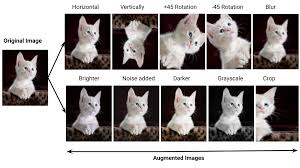


In the preprocessing of images for Computer Vision tasks, various transformations are applied to the images to prepare them for training. These transformations help enhance the model's ability to generalize by introducing variations in the training data. Here are a few common image transformations:

- `Normalization`: Scales the pixel values to a standard range, usually between -1 and 1 or 0 and 1.
    - This helps the model converge faster during training.

- `Resizing`: Changes the size of the images to a uniform size.
    - This is often necessary because neural networks require fixed-size inputs.

- `Random Cropping`: Extracts random patches from the images.
    - This helps the model learn to recognize objects regardless of their position in the image.

- `Random Horizontal Flip`: Flips the images horizontally with a certain probability.
    - This augments the dataset by creating mirror images.

- `Random Rotation`: Rotates the images by a random degree.
    - This helps the model become invariant to the orientation of the objects.

- `Color Jittering`: Randomly changes the brightness, contrast, saturation, and hue of the images.
    - This makes the model robust to variations in lighting conditions.

- `Normalization`: Adjusts the pixel values to have a mean of 0 and a standard deviation of 1.
    - This is typically done using the mean and standard deviation of the dataset.



Now let's apply those transformations in an individual image, to see how they work in practice:

- First, we need to load an image from the `CIFAR-10 `dataset without any transformations to use as our base image for comparison.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define a basic transformation to convert images to Tensor without any further processing
transform = transforms.Compose([transforms.ToTensor()])

# Download and prepare the training data with the basic transformation
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          shuffle=True, num_workers=2)

# Get a single training image
dataiter = iter(trainloader)
image, label = next(dataiter)  # Use the built-in next() function

# Display the original image
print("Original Image:")
imshow(torchvision.utils.make_grid(image))

The code seems to be quite similar to the first example, so without further ado let's apply different transformations to this image.

#### 1. `Normalization`.

In [ ]:
# Normalization transformation
normalize = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
# Apply normalization transformation to the tensorized image
normalized_image = normalize(image[0])
# Display normalized image
print("Normalized Image:")
imshow(normalized_image)

#### 2. `Resizing`.

In [ ]:
# Resizing transformation
resize = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

# Apply transformation
resized_image = resize(image[0])

# Display resized image
print("Resized Image:")
imshow(resized_image)


#### 3. `Random Cropping`.

In [ ]:
# Random cropping transformation
random_crop = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomCrop(24),
    transforms.ToTensor()
])

# Apply transformation
cropped_image = random_crop(image[0])

# Display cropped image
print("Randomly Cropped Image:")
imshow(cropped_image)

#### 4. `Random Horizontal Flip`.

In [ ]:
# Random horizontal flip transformation
horizontal_flip = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(1),  # Set probability to 1 for demonstration
    transforms.ToTensor()
])

# Apply transformation
flipped_image = horizontal_flip(image[0])

# Display horizontally flipped image
print("Horizontally Flipped Image:")
imshow(flipped_image)

#### 5. `Random Rotation`.

In [ ]:
# Random rotation transformation
random_rotation = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomRotation(45),  # Rotate by 45 degrees for demonstration
    transforms.ToTensor()
])

# Apply transformation
rotated_image = random_rotation(image[0])

# Display rotated image
print("Randomly Rotated Image:")
imshow(rotated_image)

#### 6. `Color Jittering`.

In [ ]:
# Color jittering transformation
color_jitter = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.1),
    transforms.ToTensor()
])

# Apply transformation
jittered_image = color_jitter(image[0])

# Display color jittered image
print("Color Jittered Image:")
imshow(jittered_image)

Each transformation modifies the image in a unique way, and by applying these transformations during the preprocessing stage, we can augment our dataset and improve the robustness and generalization ability of our Computer Vision models. The code snippets above demonstrate how to apply each transformation individually and visualize the results using `PyTorch` and `matplotlib`.

## [3. Machine Learning vs Deep Learning.]()



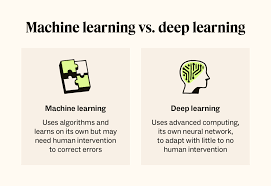


<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTlNx-TNlDM-6N_CQAVLd3VnjTHCT5tNrfRePPB1kmqF5zaimVeZ6dU6tItsezNfLaU88k&usqp=CAU" alt="example image" width="500">

### **Machine Learning**

Machine Learning (ML) is a field of artificial intelligence that enables computers to learn from data and improve their performance over time without being explicitly programmed. Instead of following pre-defined rules, machine learning algorithms analyze data, recognize patterns, and make decisions based on that analysis.

**Main Methods of Machine Learning:**

1. **Supervised Learning:**
   - **`What It Is:`** Supervised learning involves training a model on a labeled dataset. Each training example includes an input and the corresponding correct output (label). The model learns to map inputs to the correct outputs by minimizing the difference between its predictions and the actual labels.
   - **`Example:`** Training a model to classify images of animals, where each image is labeled with the name of the animal (e.g., cat, dog).

2. **Unsupervised Learning:**
   - **`What It Is:`** Unsupervised learning involves training a model on an unlabeled dataset. The model tries to identify patterns, structures, or relationships in the data without any specific labels to guide it.
   - **`Example:`** Grouping similar customer profiles into clusters based on purchasing behavior, without predefined categories.

3. **Reinforcement Learning:**
   - **`What It Is:`** Reinforcement learning involves training an agent to make decisions by interacting with an environment. The agent learns to take actions that maximize cumulative rewards over time and receives feedback from the environment in the form of rewards or penalties.
   - **`Example:`** Training a robot to navigate a maze by rewarding it for moving closer to the goal and penalizing it for hitting walls.

Machine Learning enables computers to make intelligent decisions by learning from data. Supervised learning focuses on predicting known outputs, unsupervised learning discovers hidden patterns, and reinforcement learning involves learning optimal actions through trial and error.

### **Deep Learning**

Deep Learning is a subset of Machine Learning that involves neural networks with many layers—hence the term "deep." It allows computers to automatically learn features from raw data through multiple levels of abstraction.

**What Exactly Does Deep Learning Mean?**
Deep Learning refers to using artificial neural networks with many layers (often hundreds or thousands) to model complex patterns in data. These models learn hierarchical representations, where each layer captures different levels of abstraction. For example, in image recognition, early layers might detect edges, while deeper layers might recognize shapes or objects.



**What are Neural Networks?**
Neural Networks are computational models inspired by the human brain's structure and function. They consist of interconnected nodes or "neurons" organized into layers:

- **`Input Layer:`** The layer that receives the raw data.
- **`Hidden Layers:`** Intermediate layers where computations are performed and features are extracted. There can be one or more hidden layers.
- **`Output Layer:`** The layer that produces the final prediction or classification.

Each neuron in a layer is connected to neurons in the subsequent layer through weights, which are adjusted during training to minimize the error in predictions.

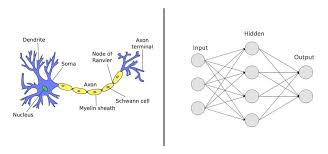




**Relation to Deep Learning:**

- **`Foundation:`** Deep Learning is a specific type of Neural Network with many hidden layers, hence the term "deep." Traditional Neural Networks with only a few layers are sometimes referred to as shallow networks.
- **`Complexity:`** Deep Learning networks are more complex than traditional Neural Networks because they have multiple layers. Each layer in a Deep Learning model learns increasingly abstract features of the data.
- **`Training:`** Both Neural Networks and Deep Learning models are trained using similar techniques, such as backpropagation, where the network adjusts weights to reduce prediction errors. Deep Learning models require advanced optimization techniques and substantial computational resources due to their complexity.

In essence, while all Deep Learning models are Neural Networks, not all Neural Networks are considered Deep Learning models. Deep Learning refers to Neural Networks with many layers and complex architectures designed to handle intricate tasks and large datasets.

### **Differences with Machine Learning**

<img src="https://images.prismic.io/turing/652ebc26fbd9a45bcec81819_Deep_Learning_vs_Machine_Learning_3033723be2.webp?auto=format%2Ccompress&fit=max&w=3840" alt="example image" width="00">


- **`Complexity`:** Traditional `Machine Learning` algorithms might require feature engineering and are generally less complex. `Deep Learning` algorithms automatically learn features from raw data, eliminating the need for manual feature extraction.
- **`Data Requirements:`** `Deep Learning` models typically require large amounts of data to train effectively. `Machine Learning` algorithms can often work well with smaller datasets.
- **`Computational Resources:`** `Deep Learning` models are computationally intensive and require powerful hardware, such as `GPUs`, for efficient training. Traditional `Machine Learning` models are generally less resource-demanding.
- **`Performance:`** `Deep Learning` often performs better on tasks involving unstructured data like images, audio, and text, due to its ability to learn complex patterns. Machine Learning techniques can be very effective for structured data but might not capture intricate details as effectively as Deep Learning.

In bried, `Deep Learning` extends `Machine Learning` by using multi-layered neural networks to automatically learn from data, handle complex tasks, and require more data and computational power.



## [4. Image Classification.]()

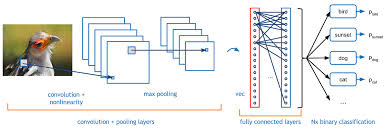

#### **Basic Concept:**
`Image classification` is a fundamental task in computer vision where **the goal is to assign a label or category to an image based on its content**. This process involves training a model to recognize patterns and features in images and make predictions about their class.

#### **Semantic Gap:**
The *'`semantic gap`'* refers to the challenge of bridging the difference between the raw image data (which is essentially a grid of pixel values) and the meaningful information that we want to extract from it (like recognizing objects or scenes). To address this gap:

- **`Processing Images into Computable Data`:** Images are converted into numerical data that machine learning models can understand. This typically involves transforming the raw pixel values into tensors, normalizing them, and feeding them into neural networks.
- **`Goal`:** The ultimate aim is to extract meaningful, high-level information from images that can be used for classification.

#### **Basic Challenges in Image Classification:**
- `Change in Viewpoint`: Images of the same object taken from different angles can look different.
- `Intra-class Variation`: Objects of the same class can vary in appearance (e.g., different breeds of dogs).
- `Detailed Categories`: Distinguishing between very similar categories can be challenging.
- `Background Clutter`: Complex or noisy backgrounds can make it hard for the model to focus on the main object.
- `Lighting Variations`: Changes in lighting conditions can affect how objects appear in images.
- `Distortions`: Objects can be distorted or occluded, making it difficult to identify them accurately.

## **Using Machine Learning Methods:**
Machine learning methods are employed to train classifiers to handle these challenges by learning from large datasets and improving their performance over time. The classifier is evaluated based on its effectiveness, robustness, and reliability.

**Data-Driven Approach:**

- `Dataset Collection`: Collect a dataset with images and labels. For instance, the `CIFAR-10` dataset used here contains images of 10 different classes.
- `Training a Classifier`: Use machine learning methods to train a model on this dataset.
- `Applying and Evaluating the Classifier`: Test the classifier on new images to evaluate its performance.

Let's demonstrate an image classification task using the `CIFAR-10` dataset with `PyTorch`. We will define a simple convolutional neural network (CNN), train it on the `CIFAR-10` training data, and evaluate its performance on the test data.

#### **Example - `#03`: Image Classification with `CIFAR-10` Dataset:**
In this example, you will first define a `Convolutional Neural Network` (`CNN`) model, which includes two convolutional layers followed by three fully connected layers. To enhance the network's learning efficiency, you will normalize the images to have values between -1 and 1. Next, you will load and prepare the `CIFAR-10` training and test datasets for training. The network will be trained over several epochs, with weights adjusted based on the loss calculated during each iteration. After training, you will evaluate the model's performance on the test data to assess its accuracy. Finally, you will display some random test images along with their predicted labels. This example will guide you through the complete workflow of training a neural network for image classification using `PyTorch`, covering model definition, data preparation, training, evaluation, and result visualization.


In [ ]:
import torch.nn as nn
import torch.optim as optim

The `torch.nn` module in `PyTorch` provides a comprehensive suite of tools for building and training neural networks. It includes essential classes and functions for defining various types of layers (such as convolutional layers, linear layers, and activation functions) and constructing complex network architectures. This module also offers utilities for loss functions, which are critical for measuring the performance of a model and guiding its training process. Essentially, torch.nn enables you to define the structure and behavior of your neural network.

The `torch.optim module` is responsible for implementing various optimization algorithms used to train neural networks. These optimizers adjust the weights of the network based on the gradients calculated during backpropagation to minimize the loss function. Common optimizers provided by this module include Stochastic Gradient Descent (`SGD`), `Adam,` and `RMSprop`. By selecting an appropriate optimizer and tuning its parameters, you can effectively improve the learning process and performance of your model.

#### 1. `Define the Neural Network Model`.

In [ ]:
# Define a simple CNN
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.nn.functional.relu(self.conv1(x)))
        x = self.pool(torch.nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

The first step is to create a neural network model. For image classification tasks, we usually use a `Convolutional Neural Network` (`CNN`) which is effective in extracting and learning features from images. In `PyTorch`, you define this model by subclassing `nn.Module`. You build layers that process the image through convolutional operations, followed by pooling to reduce dimensions, and fully connected layers to make final predictions. This model will learn to recognize patterns in the `CIFAR-10` dataset images.

> Don't worry if you don't fully understand this piece of code just yet. This is merely a demonstration to show how the code runs in `PyTorch`. In the upcoming tutorials, we will delve into the details of how neural networks work, what each of these layers means, and we will also explore built-in models. We will discuss and clarify every aspect of the code you see now in more depth.

#### **2**. `Set Up Data Transformations and Prepare the Dataset`.

In [ ]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=4,
    shuffle=False,
    num_workers=2
)

Before feeding images into the model, we need to preprocess them. This involves transforming images into tensors (a type of data structure used by `PyTorch`) and normalizing pixel values. Normalization helps to standardize the input data, making the training process more efficient. In this step, we define a transformation pipeline using transforms.Compose to apply these operations to each image.

Next, we need to load the `CIFAR-10` dataset, which consists of images and their corresponding labels. This dataset is divided into training and testing sets. Using `PyTorch’s` `torchvision.datasets.CIFAR10`, we can download and prepare these datasets. The DataLoader class helps in batching the data and shuffling it, which is crucial for training the model effectively. This step ensures that the data is properly organized and ready for the model to process.

#### 3. `Initialize the Network`.

In [ ]:
# Initialize your model based on the architecture defined in the Net class.
model = Net()

This line of code creates an instance of the `Net` class, which is your neural network model. The `Net` class defines the architecture of your model, including the layers and how data flows through them. By calling `Net()`, you are essentially building the network as specified in the `Net` class definition. This instance, net, is now ready to be trained and used for making predictions.

### 4. `Define Loss Function (criterion) and Optimization Function`.

In [ ]:
# Define a loss function and optimizer
# Sets up the loss function to evaluate how well the model performs.
criterion = nn.CrossEntropyLoss()

# configures the optimizer to update the model’s parameters based on the gradients.
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

`Loss Function`:
- `Purpose`: The loss function measures how well the model’s predictions match the actual labels. In this case, `CrossEntropyLoss` is used, which is common for classification tasks. It computes the difference between the predicted class probabilities and the true class labels.
- `Why It's Important`: The loss function provides feedback on the model’s performance during training. The goal of training is to minimize this loss, meaning the model’s predictions are getting closer to the true labels.

`Optimizer`:
- `Purpose`: The optimizer is responsible for updating the model’s parameters (weights and biases) based on the gradients computed during backpropagation. `SGD` stands for Stochastic Gradient Descent, a popular optimization algorithm.
- `Parameters`:
    - `model.parameters()`: Passes the model parameters to the optimizer so it knows which parameters to update.
    - `lr=0.001`: Sets the learning rate, which controls how much the parameters are adjusted during each step. A smaller learning rate means smaller updates, while a larger rate means bigger updates.
    - `momentum=0.9`: This parameter helps accelerate the optimizer in the right direction and dampens oscillations. It’s like adding a bit of inertia to the updates, which can help speed up training.

#### 5. `Train the Model`.

In [ ]:
# Train the network
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

Training the model involves passing the images through the network, calculating the loss (error), and adjusting the model’s parameters to minimize this error. The training loop iterates over the dataset multiple times (epochs), where for each batch of images, predictions are made, loss is computed, and the model’s parameters are updated using an optimizer like Stochastic Gradient Descent (SGD). This step allows the model to learn from the training data and improve its accuracy.

#### 6. `Test the Model - Evaluate Model's accuracy of predictions`.

In [ ]:
# Test the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

After training, it’s important to evaluate how well the model performs on unseen test data. This step tests the model’s ability to generalize its learning to new images. By using the test dataset, predictions are made and compared to the true labels to calculate the accuracy of the model. This evaluation helps us understand the model’s performance and its effectiveness in classifying new images.

#### 7. `Display Results`.

In [ ]:
# Get some random test images
dataiter = iter(testloader)
image, label = next(dataiter)
# Display images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

Finally, we visualize some sample test images and their predicted labels to get an insight into the model’s performance. By using `matplotlib`, we can display images along with their predicted labels. This step is crucial for verifying that the model is making reasonable predictions and to see how well it performs in practice.

## [5. K-Nearest Neighbors (K-NN) Classification.]()

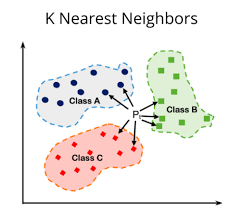


`K-Nearest Neighbors` (`K-NN`) is a simple, non-parametric classification algorithm that works **based on the principle of similarity**. Given a new sample, K-NN classifies it by finding the **'K' nearest samples in the training dataset** and **assigning the class that is most frequent among these neighbors**.

**Classification Process:**

1. `Compute Distances`: Measure the distance between the new sample and all samples in the training set.
2. `Select Nearest Neighbors`: Identify the K closest samples (neighbors) based on the distance metric (e.g., Euclidean distance).
3. `Assign Class`: Determine the most common class among these K neighbors and assign this class to the new sample.

**Advantages and Disadvantages:**

- `Advantages`: Simple to implement, intuitive, and effective for small datasets.
- `Disadvantages`: Can be slow with large datasets, requires storing the entire training set, and sensitive to noisy data and irrelevant features.



**Common Algorithm and Example:**

The most common distance metric used is Euclidean distance. Here is an example of K-NN classification using `PyTorch` with the `CIFAR-10` dataset:


#### **Example - `#04`:  `K-NN` in `PyTorch`,**
Below is an example of applying `K-NN classification` using the `CIFAR-10` dataset. For simplicity, we'll use `sklearn's` `K-NN` implementation to classify a small subset of images.


This example demonstrates the application of the `K-Nearest Neighbors` (`K-NN`) algorithm to classify images from the `CIFAR-10` dataset. The `CIFAR-10` dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. The goal is to use `K-NN` to classify a subset of these images and evaluate the classifier's accuracy.

Let's explain step by step the whole proccess:

1. Download `sklearn` and import it as a library.

To `install sklearn` (`scikit-learn`) in `Google Colab`, you can use the `pip` package manager. `Google Colab` usually comes with `scikit-learn` pre-installed, but if it's not available or you need to install a specific version, you can do so with the following command:

In [ ]:
!pip install scikit-learn

This command will download and install the latest version of scikit-learn and its dependencies. After installation is complete, you can import scikit-learn and use it in your Colab notebook.

And now you will be ready to use it!

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### What is `sklearn`?

`sklearn`, also known as [scikit-learn](), is a powerful and widely-used open-source machine learning library in `Python`. It provides simple and efficient tools for data mining and data analysis, making it a crucial resource for implementing machine learning algorithms and models. The library is built on `NumPy`, `SciPy`, and `matplotlib`, and it offers a wide range of supervised and unsupervised learning algorithms. Additionally, scikit-learn includes utilities for model evaluation, preprocessing, and pipeline creation, making it easier to handle various stages of a machine learning project.

### Why do we use `sklearn` in this example?

In this example, we use `sklearn` for its efficient implementation of the `K-Nearest Neighbors` (`K-NN`) classifier and tools for model evaluation. Specifically, we import `KNeighborsClassifier` **to create and train the K-NN model, which is a simple yet effective algorithm for classification tasks**. The `accuracy_score` function **is used to evaluate the performance of the model by calculating the proportion of correctly predicted labels**. Using scikit-learn allows us to leverage its optimized algorithms and evaluation metrics, ensuring reliable and accurate results with minimal code complexity.

1. `Define Transformation, extract a Small Subset of the Data for K-NN Demonstration`.

In [ ]:
# Define a basic transformation to convert images to Tensor
transform = transforms.Compose([transforms.ToTensor()])

# Download and prepare the CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

This step converts the images from the `CIFAR-10` dataset into tensors, which are the primary data structure used in `PyTorch`. The `ToTensor` transformation converts the image data into a format that can be easily processed by `PyTorch` models.

And then, we download the `CIFAR-10` dataset and split it into training and test sets. The `train=True` argument loads the training data, while `train=False` loads the test data. The
`transform=transform` argument applies the previously defined transformation to the images.

2. `Convert CIFAR-10 Images to NumPy Arrays.`

In [ ]:
# Convert CIFAR-10 images to NumPy arrays for sklearn compatibility
def to_numpy(imgs):
    return imgs.numpy().reshape(imgs.size(0), -1)

This function converts the `PyTorch` tensors to `NumPy` arrays and reshapes them. The reshaping is necessary because the K-NN classifier from `sklearn` works with 2D arrays where each row represents an image and each column represents a feature.

3. `Extract a Small Subset of the Data for K-NN Demonstration`.

In [ ]:
# Extract a small subset of the data for K-NN demonstration
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=1000,
    shuffle=True,
    num_workers=2
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=1000,
    shuffle=False,
    num_workers=2
)

Data loaders are created to load a subset of the training and test data (1000 images each) for demonstration purposes. The `batch_size=1000` argument loads 1000 images at a time, `shuffle=True` shuffles the training data to ensure randomness, and `num_workers=2` specifies the number of subprocesses to use for data loading.

4. `Load Training & TestData.`

In [ ]:
# Load training data
train_images, train_labels = next(iter(trainloader))
X_train = to_numpy(train_images)
y_train = train_labels.numpy()

# Load test data
test_images, test_labels = next(iter(testloader))
X_test = to_numpy(test_images)
y_test = test_labels.numpy()

The training images and labels are loaded and converted to `NumPy` arrays. The `next(iter(trainloader))` gets the first batch of images and labels from the training data loader.

Similarly, the test images and labels are loaded and converted to `NumPy` arrays.

5. `Define and Train the K-NN Classifier`.

In [ ]:
# Define and train the K-NN classifier
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


A K-NN classifier is defined with `k=5`, meaning it will consider the 5 nearest neighbors when making a prediction. The classifier is then trained using the training data.

6. `Predict on Test Data`.

In [ ]:
# Predict on test data
y_pred = knn.predict(X_test)

7. `Calculate Accuracy`.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of K-NN classifier: {accuracy * 100:.2f}%')

Accuracy of K-NN classifier: 23.50%


The accuracy of the classifier is calculated by comparing the predicted labels to the true labels of the test data. The accuracy is then printed as a percentage.


##### **A small summary of this example:**

- `K-NN Algorithm Workflow`:
    - `Data Preparation`: Load and preprocess the dataset.
    - `Subset Selection`: Select a manageable subset for demonstration.
    - `Training`: Store the training data (no explicit training phase).
    - `Prediction`: For each test sample, calculate the distance to all training samples, find the k nearest neighbors, and determine the majority class among them.
    - `Evaluation`: Compare the predicted labels with the true labels to assess accuracy.

- `Key Points`:
    - `Simple and Intuitive`: K-NN is easy to understand and implement.
    - `Instance-Based`: No model is built; predictions are made based on the stored instances.
    - `Distance Metric`: Euclidean distance is commonly used to measure similarity between instances.

## [6. Overall Sum Up and further explanation.]()

In this tutorial, we’ve navigated the exciting world of `computer vision` with `PyTorch`! 🚀 We’ve covered the essentials, from setting up your environment to diving into image classification and beyond.

#### **Here’s a quick Recap:**
1. **`Setting Up the Environment` 🛠️**: We started by ensuring everything was in place for a smooth experience with `PyTorch` and `computer vision` tasks.

2. **`What is Computer Vision` (`CV`) 🖼️**: We explored how computer vision allows machines to interpret and understand visual data, opening doors to amazing applications and innovations.

3. **`Machine Learning vs Deep Learning` 🤖**: We clarified the difference between traditional machine learning and deep learning, highlighting how deep learning has become crucial for tackling complex computer vision problems.

4. **`Image Classification` 🏷️**: We delved into image classification, a core computer vision task. You got hands-on experience with PyTorch to classify images and see how these concepts work in practice.

5. **`K-Nearest Neighbors` (`K-NN`) `Classification` 🔍**: We took a look at the `K-NN algorithm`, a simpler method for classifying images, and understood its workings and applications.


With this foundation, you’re all set to delve deeper into the world of computer vision and apply your new skills. 🎯 Keep experimenting, learning, and building, and your journey with `PyTorch` will continue to grow!

Your adventure in computer vision is just beginning! 😊👩‍💻👨‍💻